In [2]:
import pandas as kfp
import scipy.interpolate as interp
import scipy.ndimage as nd
import datautilities
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker, cm

In [3]:
unprocessedSig = kfp.read_csv("Signal Data/rateTable.csv", header=None)
dipoletoAmplitude = { }

for index in range(len(unprocessedSig)):
    dipoletoAmplitude[ unprocessedSig[1][index] ] = unprocessedSig[2][index]
numofmasses = 11
fulldict = {}

for index in range(1, int(len(unprocessedSig[0])/numofmasses) + 1 ):
    # print(index*numofmasses)
    fulldict[ unprocessedSig[0][index*numofmasses - 1] ] = dipoletoAmplitude


# print(datautilities.signalintegral(1, 6, 18))

# [X, Y] = np.meshgrid(unprocessedSig[0][0:4], unprocessedSig[1][0:4])
# [X, Y] = np.meshgrid(unprocessedSig[0], unprocessedSig[1])
# [X, Y] = np.meshgrid(nd.zoom(unprocessedSig[0], 5), nd.zoom(unprocessedSig[1], 20))
masspoints = np.linspace(0.5, 7.5, 10000)
dipolepoints = np.linspace( min(unprocessedSig[1]), max(unprocessedSig[1]), 10000)
M, D = np.meshgrid(np.log10(masspoints.astype(np.float)), np.log10(dipolepoints.astype(np.float)))


In [4]:
massvals = np.array(unprocessedSig[0]).astype(np.float)
dipolevals = np.array(unprocessedSig[1]).astype(np.float)
ratevals = np.array(unprocessedSig[2]).astype(np.float)

rategrid = interp.griddata((np.log10(massvals), np.log10(dipolevals)), np.log10(ratevals), (M, D), method='linear')

<ipython-input-4-e12319964eb2>:5: RuntimeWarning: divide by zero encountered in log10
  rategrid = interp.griddata((np.log10(massvals), np.log10(dipolevals)), np.log10(ratevals), (M, D), method='linear')


In [5]:
eachmasspoint = fulldict.keys()
eachmasspoint = list(eachmasspoint)
# print(M[1][715])
# print(D[1][715])

# def dipolefrommass(Mpicked, rate):
#    diffarray = np.abs(M[0] - Mpicked)
#    massindex = diffarray.argmin()
#    print(M[0][massindex])
#    for i in range(999):
#        print(rategrid[i][massindex])
#        if rate+6 > rategrid[i][massindex] > rate-6:
#            return D[i][massindex]
# dipolefrommass(1, 47)

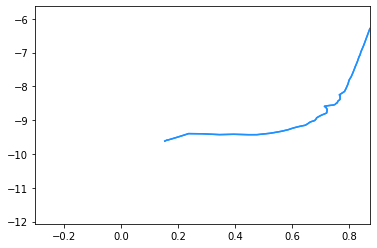

In [17]:

# acapped = rategrid.copy()
# acapped[acapped>48] = np.nan
# acapped[acapped<46] = np.nan
# cs = ax.contourf(M, D, acapped, locater=ticker.LogLocator(), cmap=cm.jet)
#  locater=ticker.LogLocator(numticks=10)
fig, ax = plt.subplots()
cs = ax.contour(M, D, rategrid, [np.log10(74.69135190474056), np.log10(74.7)], colors=['dodgerblue', 'dodgerblue'])

AttributeError: 'Figure' object has no attribute 'xaxis'

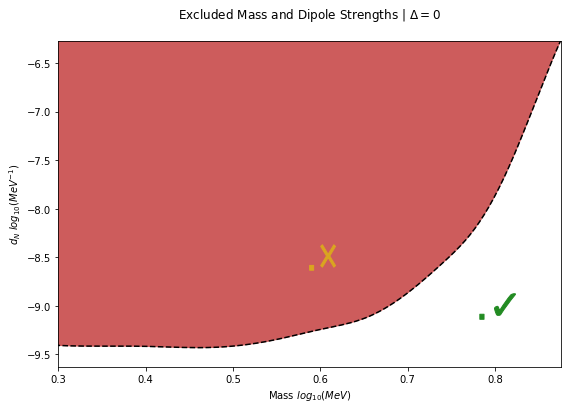

In [38]:
fig2, ax2 = plt.subplots()
massdipolePoints =  cs.collections[0].get_paths()[0]
massdipolePoints = massdipolePoints.vertices


# for mass in eachmasspoint:
#    # print(mass)
#   for coordinate in massdipolePoints:
#       if  np.log10(mass + 0.01) > coordinate[0] > np.log10(mass + 0.01):
#            print(coordinate, 10 ** coordinate[0])



x, y = zip(*massdipolePoints)

onlymassy = []
for mass in eachmasspoint:
    diffarray = np.abs(x-np.log10(mass))
    massindex = diffarray.argmin()
    onlymassy.append(y[massindex])

# print(onlymassy)
# print(len(onlymassy))
# print(len(eachmasspoint))

# ax.scatter(np.log10(eachmasspoint), onlymassy) # ----- Important
eachmasspointlog = np.log10(eachmasspoint)
eachmasspointlog.sort()
# equallist = np.equal(eachmasspointlog, eachmasspointlog)
#for o in range(len(equallist)):
#    if equallist[o] == False:
#        print("Reg List: {0}".format(eachmasspointlog[o]))
#        print("Sort List: {0}".format(eachmasspointlogsort[o]))

massnew = np.linspace(np.log10(min(eachmasspoint)), np.log10(max(eachmasspoint)), 400)
splinefit = interp.make_interp_spline(eachmasspointlog.astype(float), onlymassy, k=3)
dipolesmooth = splinefit(massnew)
ax2.plot(massnew, dipolesmooth, 'k--', color="black")

# plt.contour(M, D, amplitudegrid.T,locator=ticker.LogLocator())
# print(amplitudegrid.T)
# plt.imshow(amplitudegrid.T, origin='lower')


# cbar = fig.colorbar(cs)
# plt.yscale('log')
# plt.xscale('log')\

# plt.tight_layout()
# plt.ylim(bottom=float(1e-9))
ax2.fill_between(massnew, dipolesmooth, np.max(dipolesmooth), color='indianred' )

ax2.plot(0.6, -8.5, marker=".$\u2613$", markersize=30, color='goldenrod')
ax2.plot(0.8, -9.0, marker=".$\u2713$", markersize=40, color='forestgreen')
fig2.set_size_inches(np.multiply(fig2.get_size_inches(), 1.5))
fig2.patch.set_facecolor('white')
ax2.set_xlim(0.3, max(x))
ax2.set_ylim(min(y), max(y))
ax2.set_title("Excluded Mass and Dipole Strengths | $\Delta = 0$ ", y=1.05)
ax2.set_ylabel('$d_{N}$ $log_{10}(MeV^{-1})$')
ax2.set_xlabel('Mass $log_{10}(MeV)$')

# fig2.savefig('All Delta 0 Exclusion')
fig2.savefig('Shaded Spline Interpolation Delta 0 Exclusion')
plt.show()